# Movie Analysis
---

Importing Modules

In [1]:
import pandas as pd 

Loading the data

In [3]:
data = pd.read_json('movies_dataset.json')
data.head(5)

,color,director_name,num_critic_for_reviews,duration,gross,genres,star_name,movie_title,movie_imdb_link,language,country,budget,title_year,imdb_score
0,Color,James Cameron,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,300000000.0,2007.0,7.1
2,Color,Sam Mendes,602.0,148.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,245000000.0,2015.0,6.8
3,Color,Christopher Nolan,813.0,164.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,250000000.0,2012.0,8.5
4,NaN,Doug Walker,NaN,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,7.1


Check the dataframe shape (#rows and #columns)

In [4]:
data.shape

(5043, 14)

Let's check the data types of the columns

In [5]:
data.dtypes

color                      object
director_name              object
num_critic_for_reviews    float64
duration                  float64
gross                     float64
genres                     object
star_name                  object
movie_title                object
movie_imdb_link            object
language                   object
country                    object
budget                    float64
title_year                float64
imdb_score                float64
dtype: object

Column Selection

In [6]:
data.budget

0       237000000.0
1       300000000.0
2       245000000.0
3       250000000.0
4               NaN
           ...     
5038            NaN
5039            NaN
5040         1400.0
5041            NaN
5042         1100.0
Name: budget, Length: 5043, dtype: float64

---

## Data Preparation
Remove some columns:    
   
   - `movie_imdb_link`
   - `num_critic_for_reviews`
   - `genre`

In [8]:
data.drop(axis = 1, columns = ['movie_imdb_link', 'num_critic_for_reviews', 'genres'], inplace = True)

Exercise: Remove the rest of the columns 


In [9]:
data.head()

,color,director_name,duration,gross,star_name,movie_title,language,country,budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007.0,7.1
2,Color,Sam Mendes,148.0,200074175.0,Christoph Waltz,Spectre,English,UK,245000000.0,2015.0,6.8
3,Color,Christopher Nolan,164.0,448130642.0,Tom Hardy,The Dark Knight Rises,English,USA,250000000.0,2012.0,8.5
4,NaN,Doug Walker,NaN,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,7.1


Let's check the shape again

In [10]:
data.shape

(5043, 11)

Let's convert the dtype of `title_year` column to integer

In [11]:
data.title_year = data.title_year.astype("Int64")

Let's check the dataframe again

In [13]:
data.head(5)

,color,director_name,duration,gross,star_name,movie_title,language,country,budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1
2,Color,Sam Mendes,148.0,200074175.0,Christoph Waltz,Spectre,English,UK,245000000.0,2015,6.8
3,Color,Christopher Nolan,164.0,448130642.0,Tom Hardy,The Dark Knight Rises,English,USA,250000000.0,2012,8.5
4,NaN,Doug Walker,NaN,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,<NA>,7.1


Renaming some columns: 
- changing `gross` to `movie_income`

In [14]:
rename_dict = {"gross" : "movie_income", "language" : "Language"}
data.rename(columns = rename_dict, inplace = True)
data.head(2)

,color,director_name,duration,movie_income,star_name,movie_title,Language,country,budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1


Exercise: Rename the `budget` column to `movie_budget`

In [16]:
data.rename(columns = {'budget' : 'movie_budget'}, inplace = True)
data.head(2)

,color,director_name,duration,movie_income,star_name,movie_title,Language,country,movie_budget,title_year,imdb_score
0,Color,James Cameron,178.0,760505847.0,CCH Pounder,Avatar,English,USA,237000000.0,2009,7.9
1,Color,Gore Verbinski,169.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,English,USA,300000000.0,2007,7.1


---
### Data Analysis 


Let's checkout the distribution of `duration` column using a histogram.


Text(0.5, 1.0, 'Movie Duration Histogram')

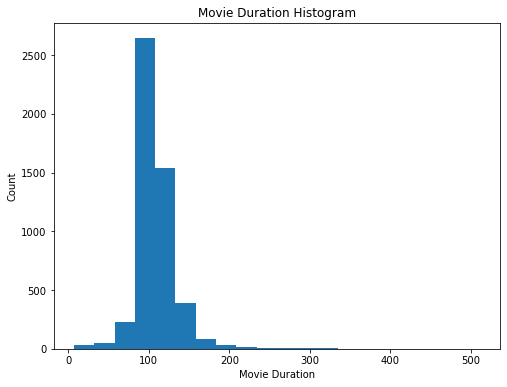

In [21]:
ax = data.duration.hist(bins=20, figsize = (8,6), grid=False)
ax.set_xlabel('Movie Duration')
ax.set_ylabel('Count')
ax.set_title('Movie Duration Histogram')

Exercise: Create a histogram to see the distribution of `imdb_score` column

Text(0.5, 1.0, 'IMDB Scores')

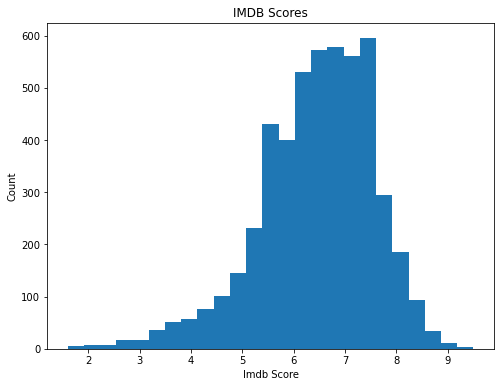

In [28]:
ax1 = data.imdb_score.hist(bins=25, grid=False, figsize=(8,6))
ax1.set_xlabel('Imdb Score')
ax1.set_ylabel('Count')
ax1.set_title('IMDB Scores')

Let's check how many movies have the `imdb_score` less than `4`.

In [30]:
low_score_movies = data[data.imdb_score < 4]
low_score_movies.shape

(156, 11)

Exercise: Use a histogram to visualize the distribution of movie IMdb score in that are produced in `USA`.

Text(0.5, 1.0, 'USA Movies IMDB Score Distribution')

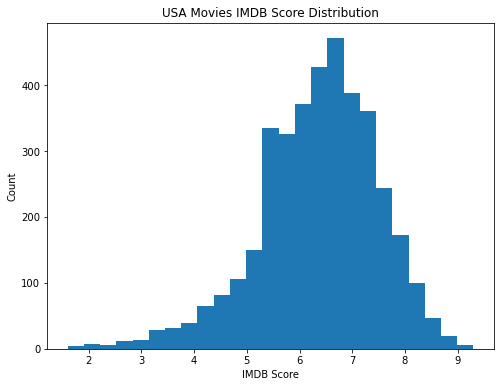

In [35]:
us_movies = data[data.country == 'USA']
ax = us_movies.imdb_score.hist(grid=False, bins=25, figsize=(8,6))
ax.set_xlabel('IMDB Score')
ax.set_ylabel('Count')
ax.set_title('USA Movies IMDB Score Distribution')

---
### Let's answer to some analytical questions 
    
Question 1 - In which year we have the `highest` and `lowest` number of movies?

Now finding out number of movies per year

In [43]:
count_per_year = data.groupby('title_year').size()
count_per_year

title_year
1916      1
1920      1
1925      1
1927      1
1929      2
       ... 
2012    221
2013    237
2014    252
2015    226
2016    106
Length: 91, dtype: int64

Let's create a line chart to show the result

Text(0, 0.5, 'Movies')

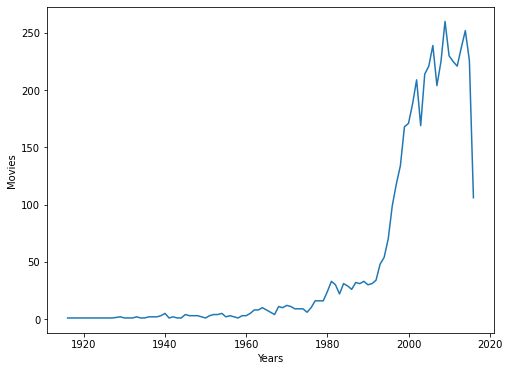

In [44]:
ax = count_per_year.plot(figsize=(8,6))
ax.set_xlabel('Years')
ax.set_ylabel('Movies')

Question 2 - In which year we have `minimum` and `maximum` average `imdb_score` ? 

Finding average imdb score per year 

In [46]:
avgscores = data.groupby('title_year')['imdb_score'].mean()
avgscores

title_year
1916    8.000000
1920    4.800000
1925    8.300000
1927    8.300000
1929    7.150000
          ...   
2012    6.266516
2013    6.369620
2014    6.228175
2015    6.033628
2016    6.399057
Name: imdb_score, Length: 91, dtype: float64

Let's Use a barchart to visualize the result

Text(0, 0.5, 'Avg Score')

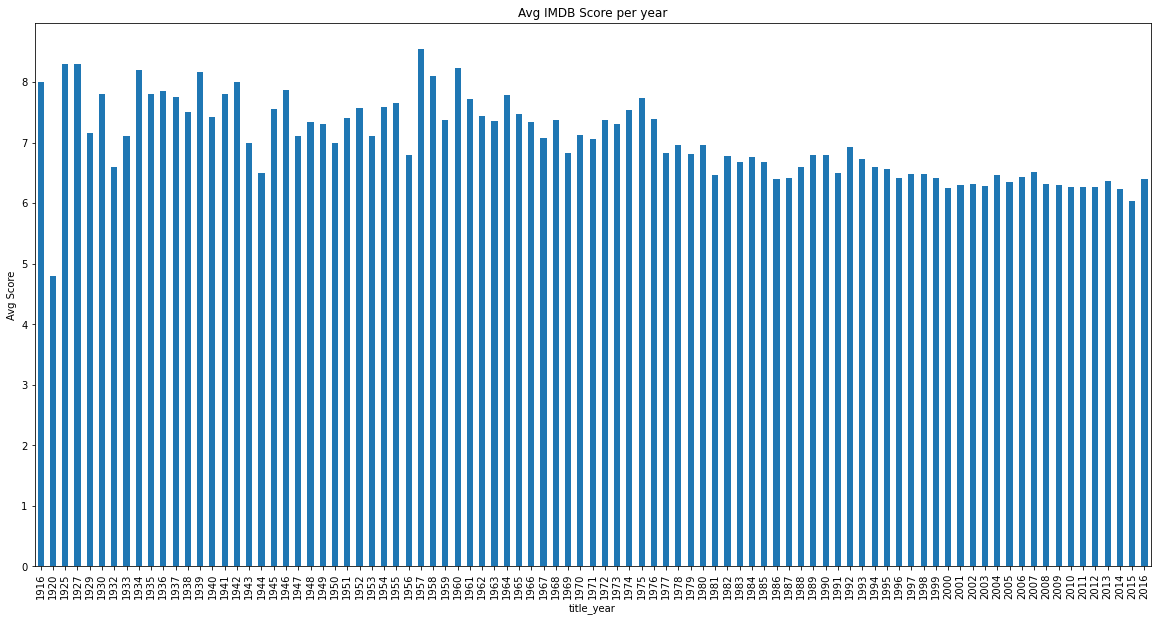

In [50]:
ax = avgscores.plot.bar(figsize=(20, 10), title = 'Avg IMDB Score per year')
ax.set_ylabel('Avg Score')

Exercise: 
Question 3 - In which year we have the `minimum` and `maximum` spent movie budget?

`hint: use a line chart to visualize your results.` 

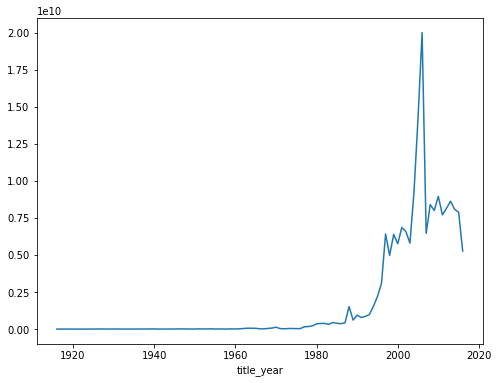

In [57]:
ax = data.groupby('title_year')['movie_budget'].sum().plot(figsize=(8,6))

Question 4 - Is there any relationship between IMdb score of a movie and the movie income?

To approaches to solve this question:
- Visual Correlation Analysis 
- Generating the Correlation Matirx

In [58]:
data_q4 = data[['imdb_score', 'movie_income']]
data_q4

,imdb_score,movie_income
0,7.9,760505847.0
1,7.1,309404152.0
2,6.8,200074175.0
3,8.5,448130642.0
4,7.1,NaN
...,...,...
5038,7.7,NaN
5039,7.5,NaN
5040,6.3,NaN
5041,6.3,10443.0


Let's drop the rows with `non` values

In [61]:
dataq4 = data_q4.dropna()

Let's create a scatter plot to see the data

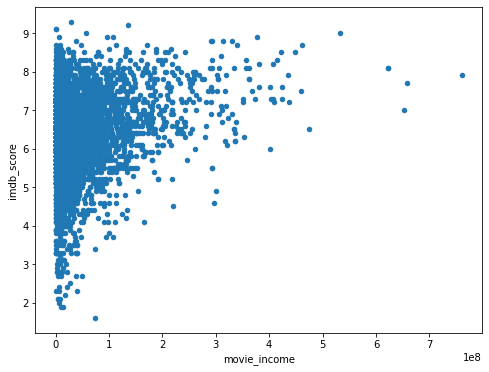

In [63]:
dataq4.plot.scatter(x='movie_income', y='imdb_score', figsize=(8,6))

Let's generate the correlation matrix

In [64]:
dataq4.corr()

,imdb_score,movie_income
imdb_score,1.000000,0.198021
movie_income,0.198021,1.000000
